In [ ]:
from sys import path
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import logging
logging.getLogger("pypsa").setLevel(logging.ERROR)

BASE_DIR = Path.cwd()
path.append(str(BASE_DIR.parent))

from custom_package.Plot_Helper_funcs import *
from custom_package.Class_funcs import *

data_file = BASE_DIR / "Timeseries_3.156_101.691_E5_1kWp_crystSi_14_0deg_-1deg_2023_2023.csv"

In [ ]:
arr = np.loadtxt(data_file, 
                 delimiter=',', 
                 skiprows=23, 
                 usecols=(1))

solar_profile = np.concatenate((np.zeros(8), arr[:-8]))/1000
solar_profile *= 1500/np.sum(solar_profile) # Scale to 1.5 MWh/year

config = {#Sen/kWh
    # "snapshots": range(len(solar_profile)),
    "holiday_arr": [0, 28, 29, 89, 90, 120, 131, 152, 157, 177, 242, 248, 257, 292, 357], # based on 2025, https://www.mytnb.com.my/tariff/index.html?v=1.1.47#faq
    "peak_hours": np.arange(13,22), # 2pm to 10pm
    "peak_profile_simplistic": False,
    "peak_profile": None, # Optional
    "grid_import_profile": np.array((np.arange(len(solar_profile)) % 24) < 8, dtype=int),
	"solar_profile": solar_profile,
    "kW_solar": 3, # kW
    "battery_efficiency": 0.9,
    "BESS_capacity": 8,
}

config["finanicials"] = {"wheeling_charge": 20, # sen/kWh
                         "electricity_price_grid": 0, # sen/kWh, already included in peak and off-peak charge
							"capacity_charge": 21.76*100, # sen/kW/month,
							"network_charge": 23.06*100, # sen/kW/month,
							"off_peak_charge": 51.09,
							"peak_charge": 55.18,
                            "peak_charge_plus": 18,
							"green_electricity_tariff": 5.0,
						 	"PV_per_kWp": 180, # MYR per kWp
                            "BESS_per_kWh": 48, # MYR per kWh
							"grid_charging_tariff": 60, # sen/kWh, IN TOTAL: inbetween 
                            "peak_quadratic_cost": 10
						 }


1500.0


<>:1: DeprecationWarning: invalid escape sequence '\D'
<>:1: DeprecationWarning: invalid escape sequence '\D'
C:\Users\royro\AppData\Local\Temp\ipykernel_35024\1906550387.py:1: DeprecationWarning: invalid escape sequence '\D'
  arr = np.loadtxt('C:\\Users\\royro\Desktop\\Solar_PPAs\\Timeseries_3.156_101.691_E5_1kWp_crystSi_14_0deg_-1deg_2023_2023.csv',


In [ ]:
solar_arr = np.arange(1, 7.5, 0.5) # kWp
BESS_arr = np.arange(0, 17, 2) # kWh

result_arr = np.zeros((len(solar_arr), len(BESS_arr)))
CRESS_arr = array = [[0 for _ in range(len(BESS_arr))] for _ in range(len(solar_arr))]
for i, solar_kW in enumerate(solar_arr):
	for j, BESS_kWh in enumerate(BESS_arr):
		config["kW_solar"] = solar_kW
		config["BESS_capacity"] = BESS_kWh

		CRESS = CRESS_network("grid_charging", config, label=f"CRESS with Grid Charging, {config['kW_solar']}kW solar, {config['BESS_capacity']}kWh BESS")

		CRESS.initialize_network()

		CRESS.n.optimize(
			solver_name="highs",
			solver_options={
				"solver": "ipm",
				"presolve": "on",          # default, but make explicit
				"parallel": "on",
				"threads": 8,              # match your CPU cores
				"time_limit": 3600,        # seconds   
			}
		)
		total_cost = CRESS.calculate_total_costs2(print_bool=True)
		CRESS.gather_statistics()
		print(i, j, total_cost)
		result_arr[i, j] = total_cost
		CRESS_arr[i][j] = CRESS




C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)


peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 83.38it/s]
INFO:linopy.io: Writing time: 1.47s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 0 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 0 5165.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 80.87it/s]
INFO:linopy.io: Writing time: 1.59s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal

C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)


n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 96 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 1 5261.309020670861
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 73.46it/s]
INFO:linopy.io: Writing time: 1.63s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 192 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 2 5357.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 54.92it/s]
INFO:linopy.io: Writing time: 1.93s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 288 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 3 5453.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 67.38it/s]
INFO:linopy.io: Writing time: 1.99s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 384 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 4 5549.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.92it/s]
INFO:linopy.io: Writing time: 2.0s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 480 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 5 5645.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 55.10it/s]
INFO:linopy.io: Writing time: 1.91s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 576 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 6 5741.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 69.18it/s]
INFO:linopy.io: Writing time: 1.96s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 672 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 7 5837.309020670861
peak
Number of peak hours in the year: 2241.0


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Class_funcs.py:149: RuntimeWarning: divide by zero encountered in scalar divide
  self.config["BESS_max_hours"] = self.config["BESS_capacity"]/(self.config["kW_solar"]-1)
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 53.44it/s]
INFO:linopy.io: Writing time: 2.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.46e+05
Solver model: available
Solver message: Optimal



n.objective: 4150.047039280438 
 wheeling_charge: 297.42198139042324 
 battery yearly cost: 768 
 solar yearly cost: 180.0 
 capacity charge: 537.84
0 8 5933.309020670861
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 59.44it/s]
INFO:linopy.io: Writing time: 1.87s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.00e+05
Solver model: available
Solver message: Optimal



n.objective: 3735.2016095016133 
 wheeling_charge: 441.709083695811 
 battery yearly cost: 0 
 solar yearly cost: 270.0 
 capacity charge: 537.84
1 0 4984.750693197425
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 59.75it/s]
INFO:linopy.io: Writing time: 2.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.92e+05
Solver model: available
Solver message: Optimal



n.objective: 3739.624693097128 
 wheeling_charge: 439.4892819379057 
 battery yearly cost: 96 
 solar yearly cost: 270.0 
 capacity charge: 533.5352763979662
1 1 5078.649251432998
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 62.21it/s]
INFO:linopy.io: Writing time: 1.96s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3776.8306711287432 
 wheeling_charge: 430.74694390614866 
 battery yearly cost: 192 
 solar yearly cost: 270.0 
 capacity charge: 375.34587665921663
1 2 5044.923491694109
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 64.50it/s]
INFO:linopy.io: Writing time: 2.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3774.4900487551827 
 wheeling_charge: 430.22444291096343 
 battery yearly cost: 288 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 3 5031.6344916661465
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 50.21it/s]
INFO:linopy.io: Writing time: 2.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3773.5930026238575 
 wheeling_charge: 430.22444291096343 
 battery yearly cost: 384 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 4 5126.737445534821
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.55it/s]
INFO:linopy.io: Writing time: 2.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3773.315139821624 
 wheeling_charge: 430.22444291096343 
 battery yearly cost: 480 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 5 5222.4595827325875
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 56.56it/s]
INFO:linopy.io: Writing time: 1.98s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3773.240289012103 
 wheeling_charge: 430.22444291096355 
 battery yearly cost: 576 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 6 5318.384731923066
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 53.37it/s]
INFO:linopy.io: Writing time: 2.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3773.240289012103 
 wheeling_charge: 430.22444291096355 
 battery yearly cost: 672 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 7 5414.384731923066
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 59.05it/s]
INFO:linopy.io: Writing time: 2.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.88e+05
Solver model: available
Solver message: Optimal



n.objective: 3773.2402890121025 
 wheeling_charge: 430.22444291096355 
 battery yearly cost: 768 
 solar yearly cost: 270.0 
 capacity charge: 268.92
1 8 5510.384731923066
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 65.53it/s]
INFO:linopy.io: Writing time: 2.01s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.70e+05
Solver model: available
Solver message: Optimal



n.objective: 3462.9083403471573 
 wheeling_charge: 536.3412365994838 
 battery yearly cost: 0 
 solar yearly cost: 360.0 
 capacity charge: 537.84
2 0 4897.089576946641
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 55.08it/s]
INFO:linopy.io: Writing time: 2.08s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.45e+05
Solver model: available
Solver message: Optimal



n.objective: 3303.2470013734187 
 wheeling_charge: 587.2779297660487 
 battery yearly cost: 96 
 solar yearly cost: 360.0 
 capacity charge: 512.109336461107
2 1 4858.634267600574
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 73.18it/s]
INFO:linopy.io: Writing time: 2.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.40e+05
Solver model: available
Solver message: Optimal



n.objective: 3335.7840223604603 
 wheeling_charge: 578.592037200951 
 battery yearly cost: 192 
 solar yearly cost: 360.0 
 capacity charge: 341.65030449970163
2 2 4808.026364061113
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 48.64it/s]
INFO:linopy.io: Writing time: 1.96s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.37e+05
Solver model: available
Solver message: Optimal



n.objective: 3362.3782253843156 
 wheeling_charge: 571.8790733063042 
 battery yearly cost: 288 
 solar yearly cost: 360.0 
 capacity charge: 77.79016614664727
2 3 4660.047464837267
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.00it/s]
INFO:linopy.io: Writing time: 2.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.36e+05
Solver model: available
Solver message: Optimal



n.objective: 3357.6243394458147 
 wheeling_charge: 571.1994290310903 
 battery yearly cost: 384 
 solar yearly cost: 360.0 
 capacity charge: 0.0
2 4 4672.823768476905
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 52.43it/s]
INFO:linopy.io: Writing time: 2.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.35e+05
Solver model: available
Solver message: Optimal



n.objective: 3350.6144730264764 
 wheeling_charge: 571.1994290310903 
 battery yearly cost: 480 
 solar yearly cost: 360.0 
 capacity charge: 0.0
2 5 4761.813902057566
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.31it/s]
INFO:linopy.io: Writing time: 2.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.35e+05
Solver model: available
Solver message: Optimal



n.objective: 3346.449325786612 
 wheeling_charge: 571.1994290310903 
 battery yearly cost: 576 
 solar yearly cost: 360.0 
 capacity charge: 0.0
2 6 4853.648754817702
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 46.45it/s]
INFO:linopy.io: Writing time: 2.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.34e+05
Solver model: available
Solver message: Optimal



n.objective: 3344.92106979807 
 wheeling_charge: 571.1994290310903 
 battery yearly cost: 672 
 solar yearly cost: 360.0 
 capacity charge: 0.0
2 7 4948.120498829161
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 45.99it/s]
INFO:linopy.io: Writing time: 2.0s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.34e+05
Solver model: available
Solver message: Optimal



n.objective: 3344.2535911152704 
 wheeling_charge: 571.1994290310903 
 battery yearly cost: 768 
 solar yearly cost: 360.0 
 capacity charge: 0.0
2 8 5043.45302014636
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 55.73it/s]
INFO:linopy.io: Writing time: 2.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.52e+05
Solver model: available
Solver message: Optimal



n.objective: 3306.702078016993 
 wheeling_charge: 590.55167961351 
 battery yearly cost: 0 
 solar yearly cost: 450.0 
 capacity charge: 537.84
3 0 4885.093757630503
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 58.23it/s]
INFO:linopy.io: Writing time: 2.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.12e+05
Solver model: available
Solver message: Optimal



n.objective: 2990.747742831661 
 wheeling_charge: 696.5130733192117 
 battery yearly cost: 96 
 solar yearly cost: 450.0 
 capacity charge: 504.66782550084866
3 1 4737.928641651721
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 75.15it/s]
INFO:linopy.io: Writing time: 2.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.95e+05
Solver model: available
Solver message: Optimal



n.objective: 2903.269781965749 
 wheeling_charge: 724.0362561811811 
 battery yearly cost: 192 
 solar yearly cost: 450.0 
 capacity charge: 229.49010706297938
3 2 4498.796145209909
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 47.62it/s]
INFO:linopy.io: Writing time: 2.38s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.91e+05
Solver model: available
Solver message: Optimal



n.objective: 2910.0488196703286 
 wheeling_charge: 721.7517766689795 
 battery yearly cost: 288 
 solar yearly cost: 450.0 
 capacity charge: 56.19810333721274
3 3 4425.998699676521
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 42.75it/s]
INFO:linopy.io: Writing time: 2.46s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.90e+05
Solver model: available
Solver message: Optimal



n.objective: 2902.3935996854916 
 wheeling_charge: 722.3974914766345 
 battery yearly cost: 384 
 solar yearly cost: 450.0 
 capacity charge: 0.0
3 4 4458.791091162126
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.74it/s]
INFO:linopy.io: Writing time: 2.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.90e+05
Solver model: available
Solver message: Optimal



n.objective: 2895.965540042029 
 wheeling_charge: 722.8468798613028 
 battery yearly cost: 480 
 solar yearly cost: 450.0 
 capacity charge: 0.0
3 5 4548.812419903332
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 52.77it/s]
INFO:linopy.io: Writing time: 2.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.89e+05
Solver model: available
Solver message: Optimal



n.objective: 2892.068951599354 
 wheeling_charge: 723.0479653141545 
 battery yearly cost: 576 
 solar yearly cost: 450.0 
 capacity charge: 0.0
3 6 4641.116916913508
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 46.13it/s]
INFO:linopy.io: Writing time: 2.37s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.89e+05
Solver model: available
Solver message: Optimal



n.objective: 2889.735043645785 
 wheeling_charge: 723.1513416347493 
 battery yearly cost: 672 
 solar yearly cost: 450.0 
 capacity charge: 0.0
3 7 4734.886385280534
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 69.32it/s]
INFO:linopy.io: Writing time: 1.88s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.89e+05
Solver model: available
Solver message: Optimal



n.objective: 2888.5124908492166 
 wheeling_charge: 723.193505336885 
 battery yearly cost: 768 
 solar yearly cost: 450.0 
 capacity charge: 0.0
3 8 4829.705996186101
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 62.16it/s]
INFO:linopy.io: Writing time: 1.88s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.41e+05
Solver model: available
Solver message: Optimal



n.objective: 3204.8125372587638 
 wheeling_charge: 625.9082665040509 
 battery yearly cost: 0 
 solar yearly cost: 540.0 
 capacity charge: 537.84
4 0 4908.560803762815
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 54.52it/s]
INFO:linopy.io: Writing time: 2.37s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.95e+05
Solver model: available
Solver message: Optimal



n.objective: 2834.255365658633 
 wheeling_charge: 751.2358351242688 
 battery yearly cost: 96 
 solar yearly cost: 540.0 
 capacity charge: 423.70057815079934
4 1 4645.191778933701
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 37.40it/s]
INFO:linopy.io: Writing time: 2.37s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.62e+05
Solver model: available
Solver message: Optimal



n.objective: 2583.623660172837 
 wheeling_charge: 834.7747576656068 
 battery yearly cost: 192 
 solar yearly cost: 540.0 
 capacity charge: 178.37000734087007
4 2 4328.768425179313
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 62.97it/s]
INFO:linopy.io: Writing time: 2.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.50e+05
Solver model: available
Solver message: Optimal



n.objective: 2496.7442828127737 
 wheeling_charge: 864.1629157894245 
 battery yearly cost: 288 
 solar yearly cost: 540.0 
 capacity charge: 35.35731482161189
4 3 4224.26451342381
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 45.59it/s]
INFO:linopy.io: Writing time: 2.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.48e+05
Solver model: available
Solver message: Optimal



n.objective: 2482.8738920159344 
 wheeling_charge: 867.8973247240707 
 battery yearly cost: 384 
 solar yearly cost: 540.0 
 capacity charge: 0.0
4 4 4274.771216740006
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 46.59it/s]
INFO:linopy.io: Writing time: 2.32s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.48e+05
Solver model: available
Solver message: Optimal



n.objective: 2478.9263764323905 
 wheeling_charge: 868.7076273973123 
 battery yearly cost: 480 
 solar yearly cost: 540.0 
 capacity charge: 0.0
4 5 4367.634003829702
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 59.29it/s]
INFO:linopy.io: Writing time: 1.73s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.48e+05
Solver model: available
Solver message: Optimal



n.objective: 2476.225520941006 
 wheeling_charge: 869.263696565739 
 battery yearly cost: 576 
 solar yearly cost: 540.0 
 capacity charge: 0.0
4 6 4461.489217506745
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 67.35it/s]
INFO:linopy.io: Writing time: 1.85s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.48e+05
Solver model: available
Solver message: Optimal



n.objective: 2475.055294112411 
 wheeling_charge: 869.5473061978597 
 battery yearly cost: 672 
 solar yearly cost: 540.0 
 capacity charge: 0.0
4 7 4556.602600310271
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.23it/s]
INFO:linopy.io: Writing time: 1.76s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.47e+05
Solver model: available
Solver message: Optimal



n.objective: 2474.3572114888298 
 wheeling_charge: 869.730746989722 
 battery yearly cost: 768 
 solar yearly cost: 540.0 
 capacity charge: 0.0
4 8 4652.087958478552
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 69.08it/s]
INFO:linopy.io: Writing time: 1.7s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.33e+05
Solver model: available
Solver message: Optimal



n.objective: 3131.1243017658126 
 wheeling_charge: 651.435372429692 
 battery yearly cost: 0 
 solar yearly cost: 630.0 
 capacity charge: 537.84
5 0 4950.399674195505
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.25it/s]
INFO:linopy.io: Writing time: 2.04s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.85e+05
Solver model: available
Solver message: Optimal



n.objective: 2743.474231051206 
 wheeling_charge: 782.8438120337183 
 battery yearly cost: 96 
 solar yearly cost: 630.0 
 capacity charge: 406.0030526736036
5 1 4658.321095758528
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 56.26it/s]
INFO:linopy.io: Writing time: 2.24s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.44e+05
Solver model: available
Solver message: Optimal



n.objective: 2413.7304475371693 
 wheeling_charge: 894.1485712545772 
 battery yearly cost: 192 
 solar yearly cost: 630.0 
 capacity charge: 218.75835298574108
5 2 4348.637371777488
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 63.14it/s]
INFO:linopy.io: Writing time: 1.97s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.19e+05
Solver model: available
Solver message: Optimal



n.objective: 2192.339496548995 
 wheeling_charge: 971.1833025043145 
 battery yearly cost: 288 
 solar yearly cost: 630.0 
 capacity charge: 21.75291372957824
5 3 4103.275712782888
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 71.36it/s]
INFO:linopy.io: Writing time: 2.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.10e+05
Solver model: available
Solver message: Optimal



n.objective: 2099.0078822685678 
 wheeling_charge: 1004.0056267376862 
 battery yearly cost: 384 
 solar yearly cost: 630.0 
 capacity charge: 0.0
5 4 4117.013509006254
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 64.68it/s]
INFO:linopy.io: Writing time: 1.84s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.08e+05
Solver model: available
Solver message: Optimal



n.objective: 2083.846069140415 
 wheeling_charge: 1009.0845890944207 
 battery yearly cost: 480 
 solar yearly cost: 630.0 
 capacity charge: 0.0
5 5 4202.930658234835
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 66.65it/s]
INFO:linopy.io: Writing time: 2.0s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.08e+05
Solver model: available
Solver message: Optimal



n.objective: 2082.3817255671206 
 wheeling_charge: 1009.4855676351522 
 battery yearly cost: 576 
 solar yearly cost: 630.0 
 capacity charge: 0.0
5 6 4297.867293202273
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 57.40it/s]
INFO:linopy.io: Writing time: 1.87s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.08e+05
Solver model: available
Solver message: Optimal



n.objective: 2081.8494670530254 
 wheeling_charge: 1009.6753549462939 
 battery yearly cost: 672 
 solar yearly cost: 630.0 
 capacity charge: 0.0
5 7 4393.524821999319
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 46.08it/s]
INFO:linopy.io: Writing time: 2.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.08e+05
Solver model: available
Solver message: Optimal



n.objective: 2081.505583871337 
 wheeling_charge: 1009.7979733031091 
 battery yearly cost: 768 
 solar yearly cost: 630.0 
 capacity charge: 0.0
5 8 4489.303557174446
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 63.82it/s]
INFO:linopy.io: Writing time: 1.8s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.26e+05
Solver model: available
Solver message: Optimal



n.objective: 3074.9401881190797 
 wheeling_charge: 670.9100753852335 
 battery yearly cost: 0 
 solar yearly cost: 720.0 
 capacity charge: 537.84
6 0 5003.690263504313
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 67.80it/s]
INFO:linopy.io: Writing time: 1.84s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.78e+05
Solver model: available
Solver message: Optimal



n.objective: 2680.685199582845 
 wheeling_charge: 804.6766008393856 
 battery yearly cost: 96 
 solar yearly cost: 720.0 
 capacity charge: 383.44404146829123
6 1 4684.805841890522
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 59.25it/s]
INFO:linopy.io: Writing time: 1.86s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.34e+05
Solver model: available
Solver message: Optimal



n.objective: 2316.8085688760552 
 wheeling_charge: 928.0065332449683 
 battery yearly cost: 192 
 solar yearly cost: 720.0 
 capacity charge: 147.7637845123658
6 2 4304.578886633389
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.97it/s]
INFO:linopy.io: Writing time: 1.94s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.02e+05
Solver model: available
Solver message: Optimal



n.objective: 2018.0452756549578 
 wheeling_charge: 1032.982390826512 
 battery yearly cost: 288 
 solar yearly cost: 720.0 
 capacity charge: 15.447379459592158
6 3 4074.4750459410616
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.13it/s]
INFO:linopy.io: Writing time: 1.87s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.81e+05
Solver model: available
Solver message: Optimal



n.objective: 1812.654290816171 
 wheeling_charge: 1105.874512356549 
 battery yearly cost: 384 
 solar yearly cost: 720.0 
 capacity charge: 0.0
6 4 4022.52880317272
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 64.48it/s]
INFO:linopy.io: Writing time: 2.01s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.72e+05
Solver model: available
Solver message: Optimal



n.objective: 1717.0466797696135 
 wheeling_charge: 1139.7634213327308 
 battery yearly cost: 480 
 solar yearly cost: 720.0 
 capacity charge: 0.0
6 5 4056.8101011023446
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 56.85it/s]
INFO:linopy.io: Writing time: 2.25s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.70e+05
Solver model: available
Solver message: Optimal



n.objective: 1697.5516691408798 
 wheeling_charge: 1146.7043433264573 
 battery yearly cost: 576 
 solar yearly cost: 720.0 
 capacity charge: 0.0
6 6 4140.256012467336
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 60.48it/s]
INFO:linopy.io: Writing time: 2.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.70e+05
Solver model: available
Solver message: Optimal



n.objective: 1696.3837007683585 
 wheeling_charge: 1147.1208055737457 
 battery yearly cost: 672 
 solar yearly cost: 720.0 
 capacity charge: 0.0
6 7 4235.504506342104
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 55.02it/s]
INFO:linopy.io: Writing time: 2.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.70e+05
Solver model: available
Solver message: Optimal



n.objective: 1696.2979851588605 
 wheeling_charge: 1147.1513691713565 
 battery yearly cost: 768 
 solar yearly cost: 720.0 
 capacity charge: 0.0
6 8 4331.449354330217
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.00it/s]
INFO:linopy.io: Writing time: 2.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.22e+05
Solver model: available
Solver message: Optimal



n.objective: 3031.326433287738 
 wheeling_charge: 686.0635251102761 
 battery yearly cost: 0 
 solar yearly cost: 810.0 
 capacity charge: 537.84
7 0 5065.229958398014
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 65.16it/s]
INFO:linopy.io: Writing time: 2.0s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.73e+05
Solver model: available
Solver message: Optimal



n.objective: 2632.390295324021 
 wheeling_charge: 821.4910553491251 
 battery yearly cost: 96 
 solar yearly cost: 810.0 
 capacity charge: 384.2175596017778
7 1 4744.098910274924
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.22it/s]
INFO:linopy.io: Writing time: 1.95s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.27e+05
Solver model: available
Solver message: Optimal



n.objective: 2254.1724942624933 
 wheeling_charge: 949.9183242351568 
 battery yearly cost: 192 
 solar yearly cost: 810.0 
 capacity charge: 135.75809603720475
7 2 4341.848914534855
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 62.51it/s]
INFO:linopy.io: Writing time: 2.03s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.92e+05
Solver model: available
Solver message: Optimal



n.objective: 1916.7864652937214 
 wheeling_charge: 1068.9705632575174 
 battery yearly cost: 288 
 solar yearly cost: 810.0 
 capacity charge: 12.05937742877846
7 3 4095.816405980018
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 58.49it/s]
INFO:linopy.io: Writing time: 2.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.64e+05
Solver model: available
Solver message: Optimal



n.objective: 1637.0161250383817 
 wheeling_charge: 1168.4104626924734 
 battery yearly cost: 384 
 solar yearly cost: 810.0 
 capacity charge: 0.0
7 4 3999.4265877308553
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 43.37it/s]
INFO:linopy.io: Writing time: 2.34s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.44e+05
Solver model: available
Solver message: Optimal



n.objective: 1443.0883721571774 
 wheeling_charge: 1237.4382698672723 
 battery yearly cost: 480 
 solar yearly cost: 810.0 
 capacity charge: 0.0
7 5 3970.5266420244498
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 46.14it/s]
INFO:linopy.io: Writing time: 2.59s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.34e+05
Solver model: available
Solver message: Optimal



n.objective: 1343.2902655969733 
 wheeling_charge: 1273.0232606179268 
 battery yearly cost: 576 
 solar yearly cost: 810.0 
 capacity charge: 0.0
7 6 4002.3135262149
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 47.21it/s]
INFO:linopy.io: Writing time: 2.44s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.32e+05
Solver model: available
Solver message: Optimal



n.objective: 1316.6492686710637 
 wheeling_charge: 1282.5226355246516 
 battery yearly cost: 672 
 solar yearly cost: 810.0 
 capacity charge: 0.0
7 7 4081.1719041957153
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 50.18it/s]
INFO:linopy.io: Writing time: 2.54s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.31e+05
Solver model: available
Solver message: Optimal



n.objective: 1313.6055258544664 
 wheeling_charge: 1283.6079422875673 
 battery yearly cost: 768 
 solar yearly cost: 810.0 
 capacity charge: 0.0
7 8 4175.213468142034
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 41.23it/s]
INFO:linopy.io: Writing time: 3.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.18e+05
Solver model: available
Solver message: Optimal



n.objective: 2996.141064092099 
 wheeling_charge: 698.3041462241864 
 battery yearly cost: 0 
 solar yearly cost: 900.0 
 capacity charge: 537.84
8 0 5132.285210316286
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 48.37it/s]
INFO:linopy.io: Writing time: 2.54s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.69e+05
Solver model: available
Solver message: Optimal



n.objective: 2594.4464042707423 
 wheeling_charge: 834.693896686296 
 battery yearly cost: 96 
 solar yearly cost: 900.0 
 capacity charge: 376.81722838135994
8 1 4801.957529338399
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 32.75it/s]
INFO:linopy.io: Writing time: 2.5s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.22e+05
Solver model: available
Solver message: Optimal



n.objective: 2208.653017941654 
 wheeling_charge: 965.8431632493285 
 battery yearly cost: 192 
 solar yearly cost: 900.0 
 capacity charge: 126.32167110872797
8 2 4392.817852299711
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 48.63it/s]
INFO:linopy.io: Writing time: 2.39s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.85e+05
Solver model: available
Solver message: Optimal



n.objective: 1853.3862142037117 
 wheeling_charge: 1091.4555860665953 
 battery yearly cost: 288 
 solar yearly cost: 900.0 
 capacity charge: 9.595494911450787
8 3 4142.437295181759
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 54.58it/s]
INFO:linopy.io: Writing time: 2.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.53e+05
Solver model: available
Solver message: Optimal



n.objective: 1530.812626893166 
 wheeling_charge: 1206.215175773047 
 battery yearly cost: 384 
 solar yearly cost: 900.0 
 capacity charge: 0.0
8 4 4021.0278026662127
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 69.77it/s]
INFO:linopy.io: Writing time: 2.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.27e+05
Solver model: available
Solver message: Optimal



n.objective: 1265.3284758102943 
 wheeling_charge: 1300.82208029583 
 battery yearly cost: 480 
 solar yearly cost: 900.0 
 capacity charge: 0.0
8 5 3946.150556106124
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 63.28it/s]
INFO:linopy.io: Writing time: 2.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.08e+05
Solver model: available
Solver message: Optimal



n.objective: 1078.1823573252043 
 wheeling_charge: 1367.5527340612432 
 battery yearly cost: 576 
 solar yearly cost: 900.0 
 capacity charge: 0.0
8 6 3921.7350913864475
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.50it/s]
INFO:linopy.io: Writing time: 2.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 9.73e+04
Solver model: available
Solver message: Optimal



n.objective: 973.0870297879788 
 wheeling_charge: 1405.0265538284862 
 battery yearly cost: 672 
 solar yearly cost: 900.0 
 capacity charge: 0.0
8 7 3950.113583616465
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 64.48it/s]
INFO:linopy.io: Writing time: 2.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 9.46e+04
Solver model: available
Solver message: Optimal



n.objective: 946.2681860229347 
 wheeling_charge: 1414.5893435468117 
 battery yearly cost: 768 
 solar yearly cost: 900.0 
 capacity charge: 0.0
8 8 4028.8575295697465
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.57it/s]
INFO:linopy.io: Writing time: 2.32s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.14e+05
Solver model: available
Solver message: Optimal



n.objective: 2966.416787852918 
 wheeling_charge: 708.6500307349976 
 battery yearly cost: 0 
 solar yearly cost: 990.0 
 capacity charge: 537.84
9 0 5202.906818587916
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 62.49it/s]
INFO:linopy.io: Writing time: 2.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.65e+05
Solver model: available
Solver message: Optimal



n.objective: 2562.8514678166403 
 wheeling_charge: 845.6760891203437 
 battery yearly cost: 96 
 solar yearly cost: 990.0 
 capacity charge: 333.47377503671436
9 1 4828.001331973698
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 50.66it/s]
INFO:linopy.io: Writing time: 2.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.18e+05
Solver model: available
Solver message: Optimal



n.objective: 2171.374277079699 
 wheeling_charge: 978.8870098386644 
 battery yearly cost: 192 
 solar yearly cost: 990.0 
 capacity charge: 126.59854870762058
9 2 4458.859835625984
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 41.96it/s]
INFO:linopy.io: Writing time: 2.74s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.81e+05
Solver model: available
Solver message: Optimal



n.objective: 1806.8084379383483 
 wheeling_charge: 1107.9511508131106 
 battery yearly cost: 288 
 solar yearly cost: 990.0 
 capacity charge: 7.131612394125229
9 3 4199.891201145584
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 39.36it/s]
INFO:linopy.io: Writing time: 3.05s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.46e+05
Solver model: available
Solver message: Optimal



n.objective: 1464.2721626172936 
 wheeling_charge: 1229.9060871280005 
 battery yearly cost: 384 
 solar yearly cost: 990.0 
 capacity charge: 0.0
9 4 4068.1782497452946
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 33.04it/s]
INFO:linopy.io: Writing time: 2.77s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.15e+05
Solver model: available
Solver message: Optimal



n.objective: 1154.8017090422272 
 wheeling_charge: 1340.2325872553865 
 battery yearly cost: 480 
 solar yearly cost: 990.0 
 capacity charge: 0.0
9 5 3965.0342962976138
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 61.77it/s]
INFO:linopy.io: Writing time: 2.66s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 9.00e+04
Solver model: available
Solver message: Optimal



n.objective: 899.7774338819418 
 wheeling_charge: 1431.1665416716098 
 battery yearly cost: 576 
 solar yearly cost: 990.0 
 capacity charge: 0.0
9 6 3896.943975553552
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 49.36it/s]
INFO:linopy.io: Writing time: 2.48s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 7.16e+04
Solver model: available
Solver message: Optimal



n.objective: 716.0729885375049 
 wheeling_charge: 1496.669998738626 
 battery yearly cost: 672 
 solar yearly cost: 990.0 
 capacity charge: 0.0
9 7 3874.742987276131
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 38.08it/s]
INFO:linopy.io: Writing time: 2.9s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 6.57e+04
Solver model: available
Solver message: Optimal



n.objective: 656.9687178404449 
 wheeling_charge: 1517.7447966338168 
 battery yearly cost: 768 
 solar yearly cost: 990.0 
 capacity charge: 0.0
9 8 3932.7135144742615
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 36.73it/s]
INFO:linopy.io: Writing time: 2.95s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.12e+05
Solver model: available
Solver message: Optimal



n.objective: 2941.1351455440017 
 wheeling_charge: 717.4499412156829 
 battery yearly cost: 0 
 solar yearly cost: 1080.0 
 capacity charge: 537.84
10 0 5276.425086759685
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 39.60it/s]
INFO:linopy.io: Writing time: 2.9s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.63e+05
Solver model: available
Solver message: Optimal



n.objective: 2535.9516624859125 
 wheeling_charge: 855.0178531474003 
 battery yearly cost: 96 
 solar yearly cost: 1080.0 
 capacity charge: 348.01077688055057
10 1 4914.980292513863
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 39.29it/s]
INFO:linopy.io: Writing time: 3.36s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.15e+05
Solver model: available
Solver message: Optimal



n.objective: 2141.4088699776153 
 wheeling_charge: 989.3763948357662 
 battery yearly cost: 192 
 solar yearly cost: 1080.0 
 capacity charge: 120.69357287167288
10 2 4523.478837685054
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 38.25it/s]
INFO:linopy.io: Writing time: 3.02s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.77e+05
Solver model: available
Solver message: Optimal



n.objective: 1771.135415303716 
 wheeling_charge: 1120.6051128114934 
 battery yearly cost: 288 
 solar yearly cost: 1080.0 
 capacity charge: 5.18535826759507
10 3 4264.9258863828045
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 47.64it/s]
INFO:linopy.io: Writing time: 2.85s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.42e+05
Solver model: available
Solver message: Optimal



n.objective: 1415.9720756368501 
 wheeling_charge: 1247.110729884974 
 battery yearly cost: 384 
 solar yearly cost: 1080.0 
 capacity charge: 0.0
10 4 4127.082805521824
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 32.22it/s]
INFO:linopy.io: Writing time: 5.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.08e+05
Solver model: available
Solver message: Optimal



n.objective: 1083.2525623102947 
 wheeling_charge: 1365.7448520911628 
 battery yearly cost: 480 
 solar yearly cost: 1080.0 
 capacity charge: 0.0
10 5 4008.9974144014573
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 43.67it/s]
INFO:linopy.io: Writing time: 2.88s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 7.84e+04
Solver model: available
Solver message: Optimal



n.objective: 783.9151189579311 
 wheeling_charge: 1472.4795439622203 
 battery yearly cost: 576 
 solar yearly cost: 1080.0 
 capacity charge: 0.0
10 6 3912.3946629201514
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.89it/s]
INFO:linopy.io: Writing time: 3.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 5.37e+04
Solver model: available
Solver message: Optimal



n.objective: 537.3922146977933 
 wheeling_charge: 1560.3821662692808 
 battery yearly cost: 672 
 solar yearly cost: 1080.0 
 capacity charge: 0.0
10 7 3849.774380967074
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.14it/s]
INFO:linopy.io: Writing time: 3.62s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.54e+04
Solver model: available
Solver message: Optimal



n.objective: 453.9420047411734 
 wheeling_charge: 1590.1379908214726 
 battery yearly cost: 768 
 solar yearly cost: 1080.0 
 capacity charge: 0.0
10 8 3892.0799955626458
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.48it/s]
INFO:linopy.io: Writing time: 2.94s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.09e+05
Solver model: available
Solver message: Optimal



n.objective: 2919.560989916267 
 wheeling_charge: 724.9561345621685 
 battery yearly cost: 0 
 solar yearly cost: 1170.0 
 capacity charge: 537.84
11 0 5352.357124478435
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 39.21it/s]
INFO:linopy.io: Writing time: 2.71s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.60e+05
Solver model: available
Solver message: Optimal



n.objective: 2513.2912771211772 
 wheeling_charge: 862.9048112322301 
 battery yearly cost: 96 
 solar yearly cost: 1170.0 
 capacity charge: 343.97980622833245
11 1 4986.175894581741
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 41.92it/s]
INFO:linopy.io: Writing time: 2.94s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.12e+05
Solver model: available
Solver message: Optimal



n.objective: 2116.729946397289 
 wheeling_charge: 998.0224431924928 
 battery yearly cost: 192 
 solar yearly cost: 1170.0 
 capacity charge: 101.90275554397918
11 2 4578.655145133761
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 33.93it/s]
INFO:linopy.io: Writing time: 2.94s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.74e+05
Solver model: available
Solver message: Optimal



n.objective: 1741.6259027941642 
 wheeling_charge: 1131.0721098353094 
 battery yearly cost: 288 
 solar yearly cost: 1170.0 
 capacity charge: 5.934403138399895
11 3 4336.632415767873
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 47.24it/s]
INFO:linopy.io: Writing time: 2.98s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.38e+05
Solver model: available
Solver message: Optimal



n.objective: 1379.3456813620805 
 wheeling_charge: 1260.1669882823542 
 battery yearly cost: 384 
 solar yearly cost: 1170.0 
 capacity charge: 0.0
11 4 4193.512669644435
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 36.20it/s]
INFO:linopy.io: Writing time: 3.3s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.03e+05
Solver model: available
Solver message: Optimal



n.objective: 1033.0346171543172 
 wheeling_charge: 1383.6510546784261 
 battery yearly cost: 480 
 solar yearly cost: 1170.0 
 capacity charge: 0.0
11 5 4066.685671832743
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 37.60it/s]
INFO:linopy.io: Writing time: 3.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 7.08e+04
Solver model: available
Solver message: Optimal



n.objective: 707.5698030490508 
 wheeling_charge: 1499.7019778751758 
 battery yearly cost: 576 
 solar yearly cost: 1170.0 
 capacity charge: 0.0
11 6 3953.2717809242267
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.68it/s]
INFO:linopy.io: Writing time: 3.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 4.17e+04
Solver model: available
Solver message: Optimal



n.objective: 416.9969307419412 
 wheeling_charge: 1603.3114884143538 
 battery yearly cost: 672 
 solar yearly cost: 1170.0 
 capacity charge: 0.0
11 7 3862.3084191562953
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 42.21it/s]
INFO:linopy.io: Writing time: 2.96s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.18e+04
Solver model: available
Solver message: Optimal



n.objective: 317.8908200713078 
 wheeling_charge: 1638.6497343300744 
 battery yearly cost: 768 
 solar yearly cost: 1170.0 
 capacity charge: 0.0
11 8 3894.540554401382
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 51.19it/s]
INFO:linopy.io: Writing time: 3.31s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.07e+05
Solver model: available
Solver message: Optimal



n.objective: 2900.753002115462 
 wheeling_charge: 731.4957766569322 
 battery yearly cost: 0 
 solar yearly cost: 1260.0 
 capacity charge: 537.84
12 0 5430.088778772394
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 40.07it/s]
INFO:linopy.io: Writing time: 3.01s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.58e+05
Solver model: available
Solver message: Optimal



n.objective: 2493.7591957756213 
 wheeling_charge: 869.7031775452845 
 battery yearly cost: 96 
 solar yearly cost: 1260.0 
 capacity charge: 315.9795935338366
12 1 5035.441966854742
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 42.11it/s]
INFO:linopy.io: Writing time: 3.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.10e+05
Solver model: available
Solver message: Optimal



n.objective: 2095.6148434836145 
 wheeling_charge: 1005.4134192785897 
 battery yearly cost: 192 
 solar yearly cost: 1260.0 
 capacity charge: 95.94772669101057
12 2 4648.975989453215
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 36.35it/s]
INFO:linopy.io: Writing time: 2.99s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.72e+05
Solver model: available
Solver message: Optimal



n.objective: 1717.4567038500522 
 wheeling_charge: 1139.6500398342293 
 battery yearly cost: 288 
 solar yearly cost: 1260.0 
 capacity charge: 1.7395810001830956
12 3 4406.846324684466
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 41.90it/s]
INFO:linopy.io: Writing time: 4.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 1.35e+05
Solver model: available
Solver message: Optimal



n.objective: 1350.1909018807255 
 wheeling_charge: 1270.5627021284429 
 battery yearly cost: 384 
 solar yearly cost: 1260.0 
 capacity charge: 0.0
12 4 4264.753604009169
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 42.34it/s]
INFO:linopy.io: Writing time: 3.41s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 9.93e+04
Solver model: available
Solver message: Optimal



n.objective: 993.4986344522041 
 wheeling_charge: 1397.7483920655236 
 battery yearly cost: 480 
 solar yearly cost: 1260.0 
 capacity charge: 0.0
12 5 4131.247026517727
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 43.38it/s]
INFO:linopy.io: Writing time: 3.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 6.54e+04
Solver model: available
Solver message: Optimal



n.objective: 654.4657413885961 
 wheeling_charge: 1518.637282442998 
 battery yearly cost: 576 
 solar yearly cost: 1260.0 
 capacity charge: 0.0
12 6 4009.103023831594
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 38.59it/s]
INFO:linopy.io: Writing time: 3.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 3.36e+04
Solver model: available
Solver message: Optimal



n.objective: 335.8716584789085 
 wheeling_charge: 1632.2383104015298 
 battery yearly cost: 672 
 solar yearly cost: 1260.0 
 capacity charge: 0.0
12 7 3900.1099688804384
peak
Number of peak hours in the year: 2241.0


INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.model:Solver options:
 - solver: ipm
 - presolve: on
 - parallel: on
 - threads: 8
 - time_limit: 3600
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00, 38.42it/s]
INFO:linopy.io: Writing time: 3.53s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 87600 primals, 166439 duals
Objective: 2.33e+04
Solver model: available
Solver message: Optimal



n.objective: 233.0181593788455 
 wheeling_charge: 1668.912761854575 
 battery yearly cost: 768 
 solar yearly cost: 1260.0 
 capacity charge: 0.0
12 8 3929.93092123342


Optimal config: 2.0 kWp solar, 4 kWh BESS, cost: 4808.026364061113 RM/year
Optimal config: 6.0 kWp solar, 14 kWh BESS, cost: 3849.774380967074 RM/year
Optimal config: 3.5 kWp solar, 8 kWh BESS, cost: 4117.013509006254 RM/year


C:\Users/royro/Desktop/Solar_PPAs\custom_package\Plot_Helper_funcs.py:130: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\royro\AppData\Local\Temp\ipykernel_35024\2164941032.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


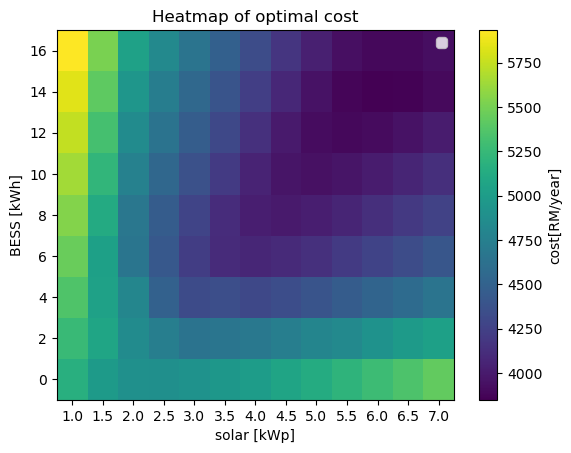

In [ ]:
produce_heatmap(result_arr, solar_arr, BESS_arr, x_label='solar [kWp]', y_label='BESS [kWh]', z_label='cost[RM/year]', title_str='Heatmap of optimal cost')

a = np.argmin(np.array(result_arr))
print(a)
i_opt, j_opt = np.unravel_index(a, result_arr.shape)
print(f"Optimal config: {solar_arr[i_opt]} kWp solar, {BESS_arr[j_opt]} kWh BESS, cost: {result_arr[i_opt, j_opt]} RM/year")

plt.legend()
plt.show()

In [ ]:
CRESS_opt = CRESS_arr[i_opt][j_opt]

print("curtailment", CRESS_opt.stats["solar_curtailment"]/(np.sum(solar_profile)*config["kW_solar"])*100, "%")
print("grid usage", np.sum(CRESS_opt.n.generators_t.p['grid_power_peak'])+np.sum(CRESS_opt.n.generators_t.p['grid_power_off_peak'])/8760*100, "%")

CRESS_opt.plot_average_day()